In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [342]:
df = pd.read_csv('/Users/sanjayakunwar/Desktop/MeriSkill/diabetes.csv') 

In [343]:
df.head(3)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1

In [344]:
df.shape

(768, 9)

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [346]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [347]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [348]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Correlation matrix

In [349]:
correlation = df.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

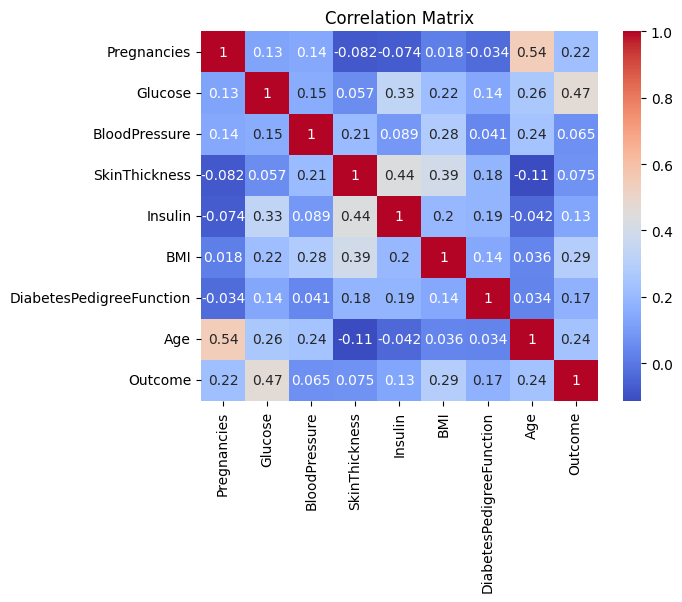

In [350]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [487]:
X = df.drop(columns=['Outcome'])
Y = df['Outcome']

In [488]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [489]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [490]:
pred = model.predict(X_test)
print(pred)

[0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0
 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 0]


In [491]:
accuracy = accuracy_score(pred, Y_test)
print(accuracy)

0.7727272727272727


## Cross validations 

In [492]:
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model,X, Y, cv=kfolds,scoring='accuracy' )
scores.mean()

0.7682624564977505

#### Even though there are no null values, we still have 0s which do not make sense, except in the 'Pregnancies' and 'Outcome' column. Therefore, we fill these 0s with 'NaN' and then replace them with the mean or median

In [358]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [410]:
# Make a copy of the data, clean it, and observe the differences .
df2 = df.copy()

In [411]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df2[columns_to_replace] = df2[columns_to_replace].replace(0, np.nan)

#### After replacing zeroes with NaN, count if the number of zeroes before and NaNs after is the same.

In [412]:
df2.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [413]:
# columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df2[columns_to_replace] = df2[columns_to_replace].fillna(df2[columns_to_replace].median())

<Axes: >

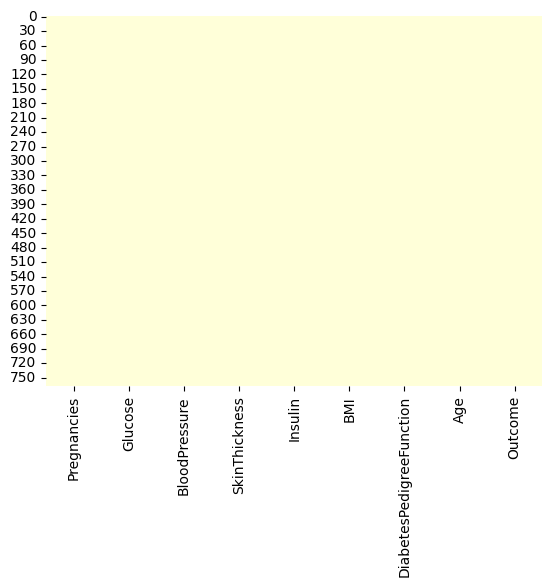

In [405]:
### Plotting null count in histogram
sns.heatmap(df2.isna(),cmap='YlGnBu', cbar=False)

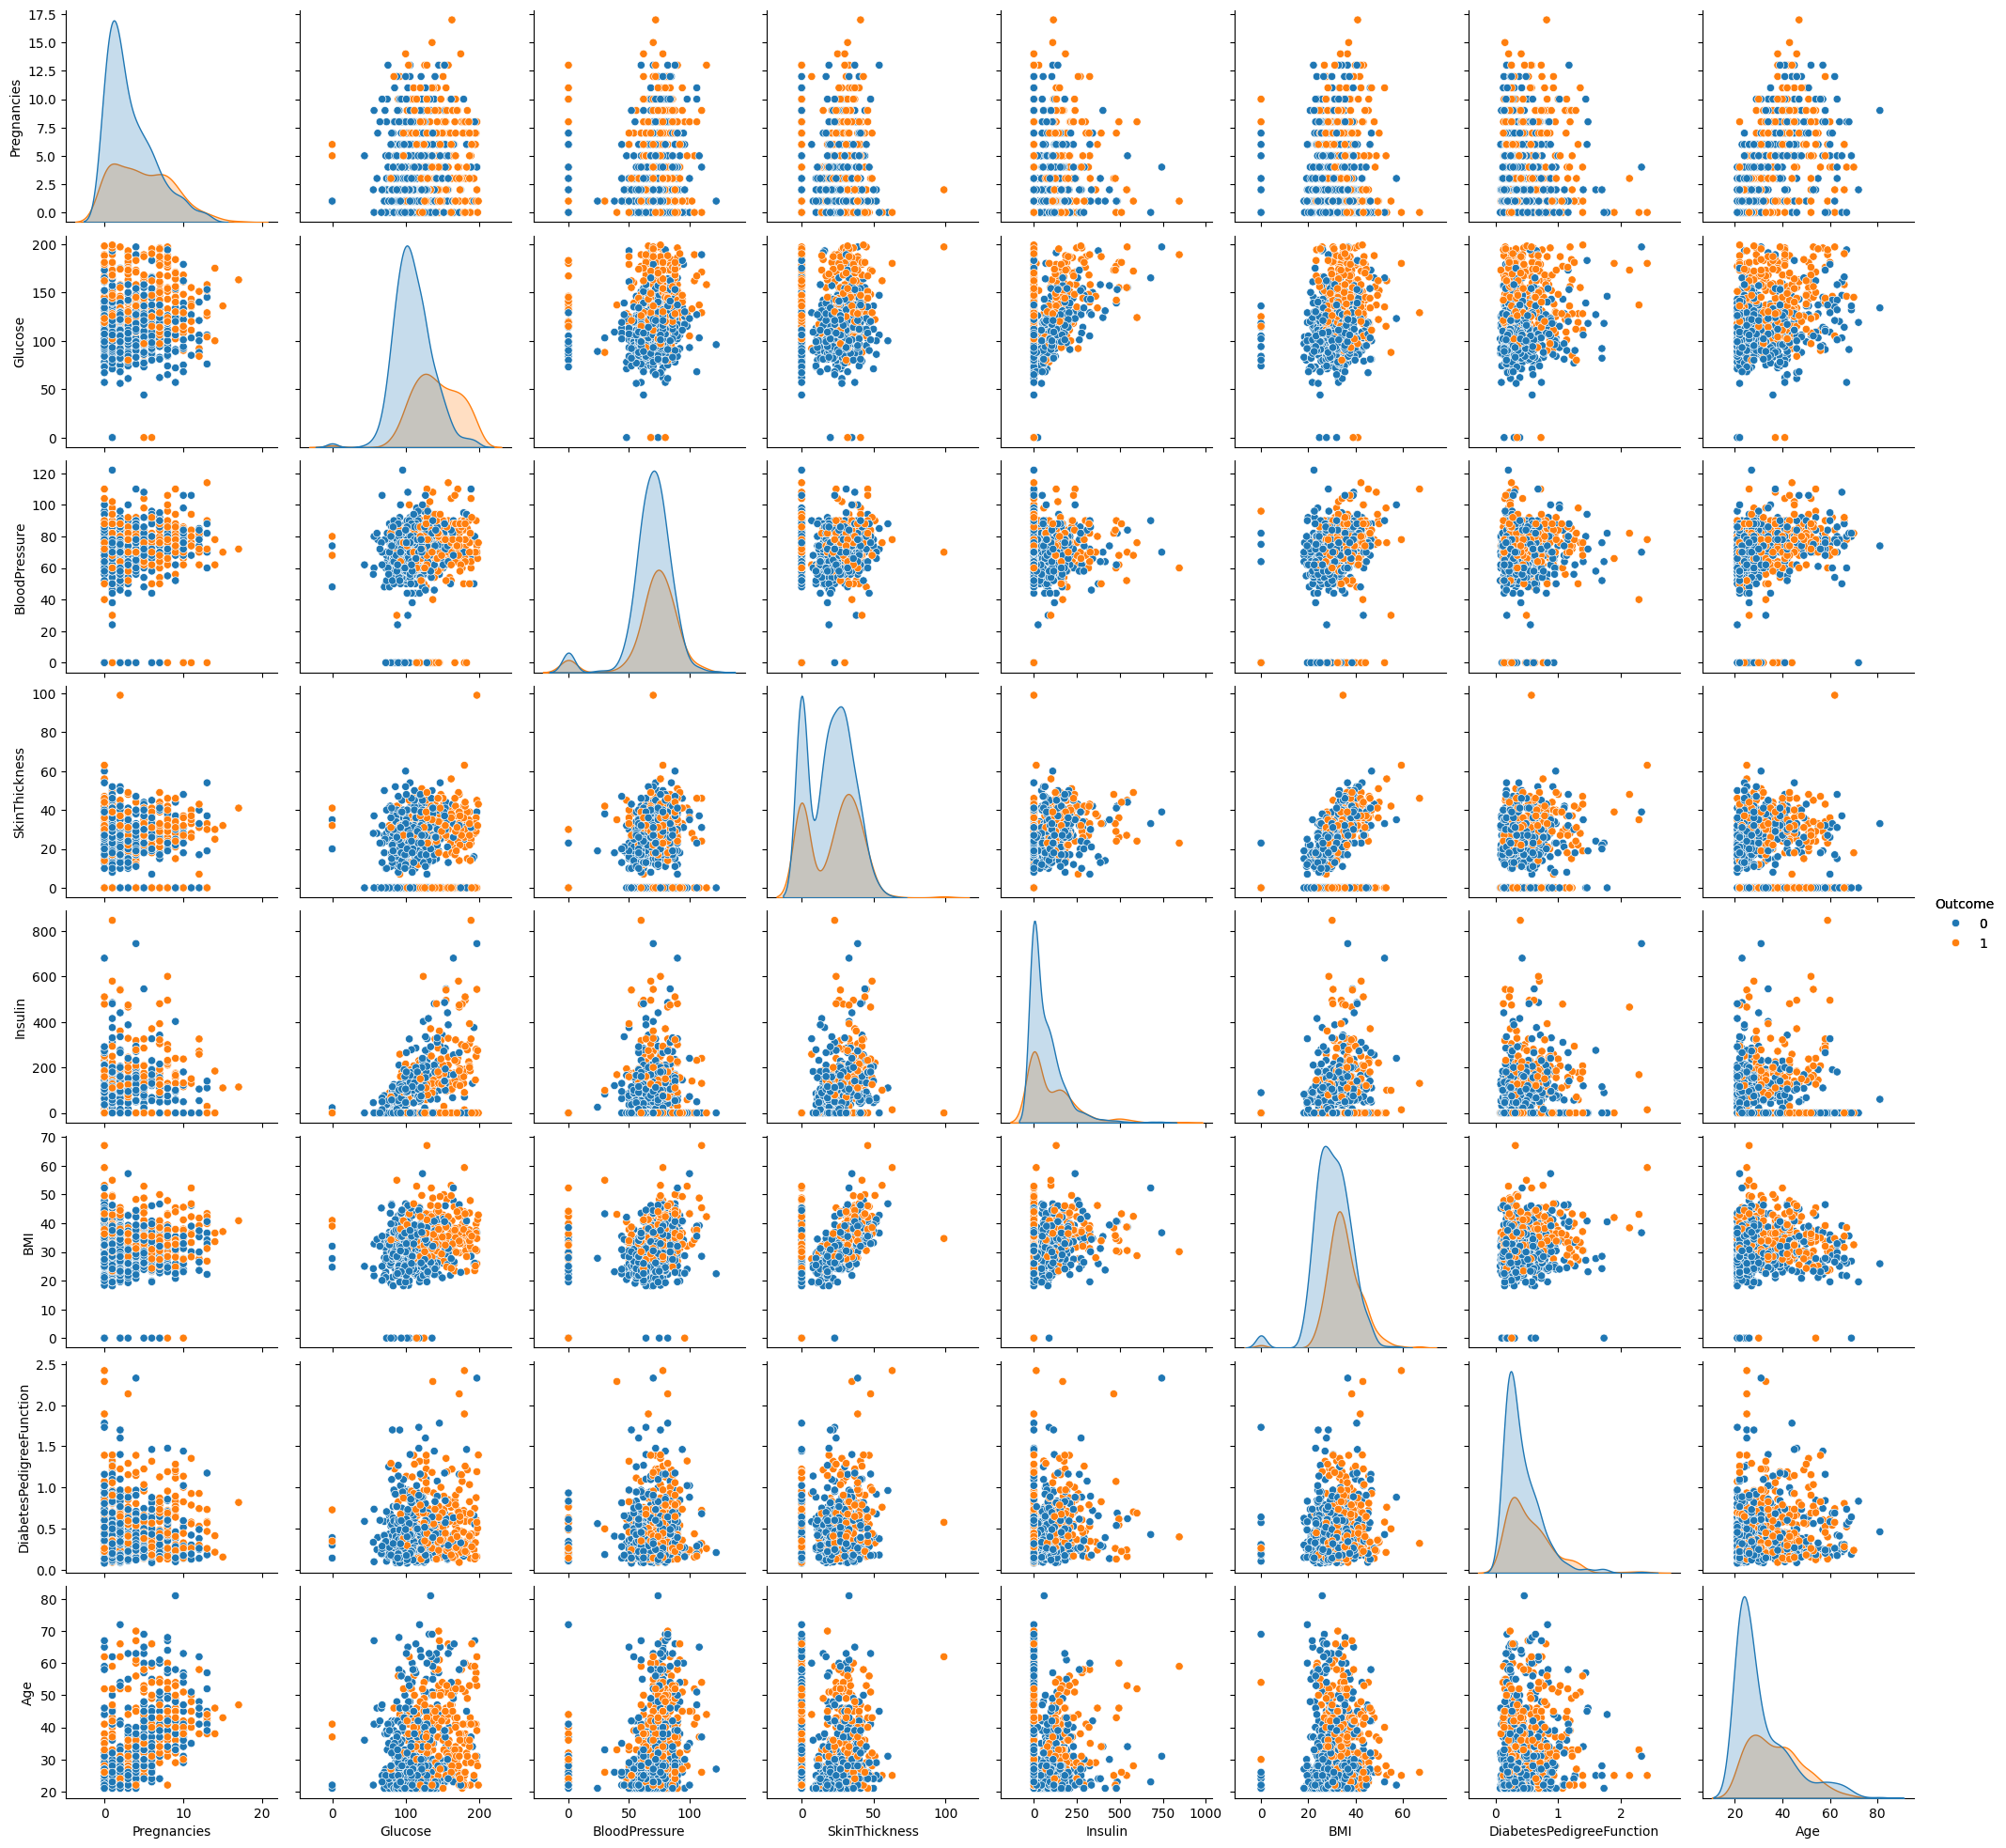

In [398]:
# pairplot with uncleaned data
pair_plot= sns.pairplot(df, hue='Outcome')
pair_plot.add_legend()

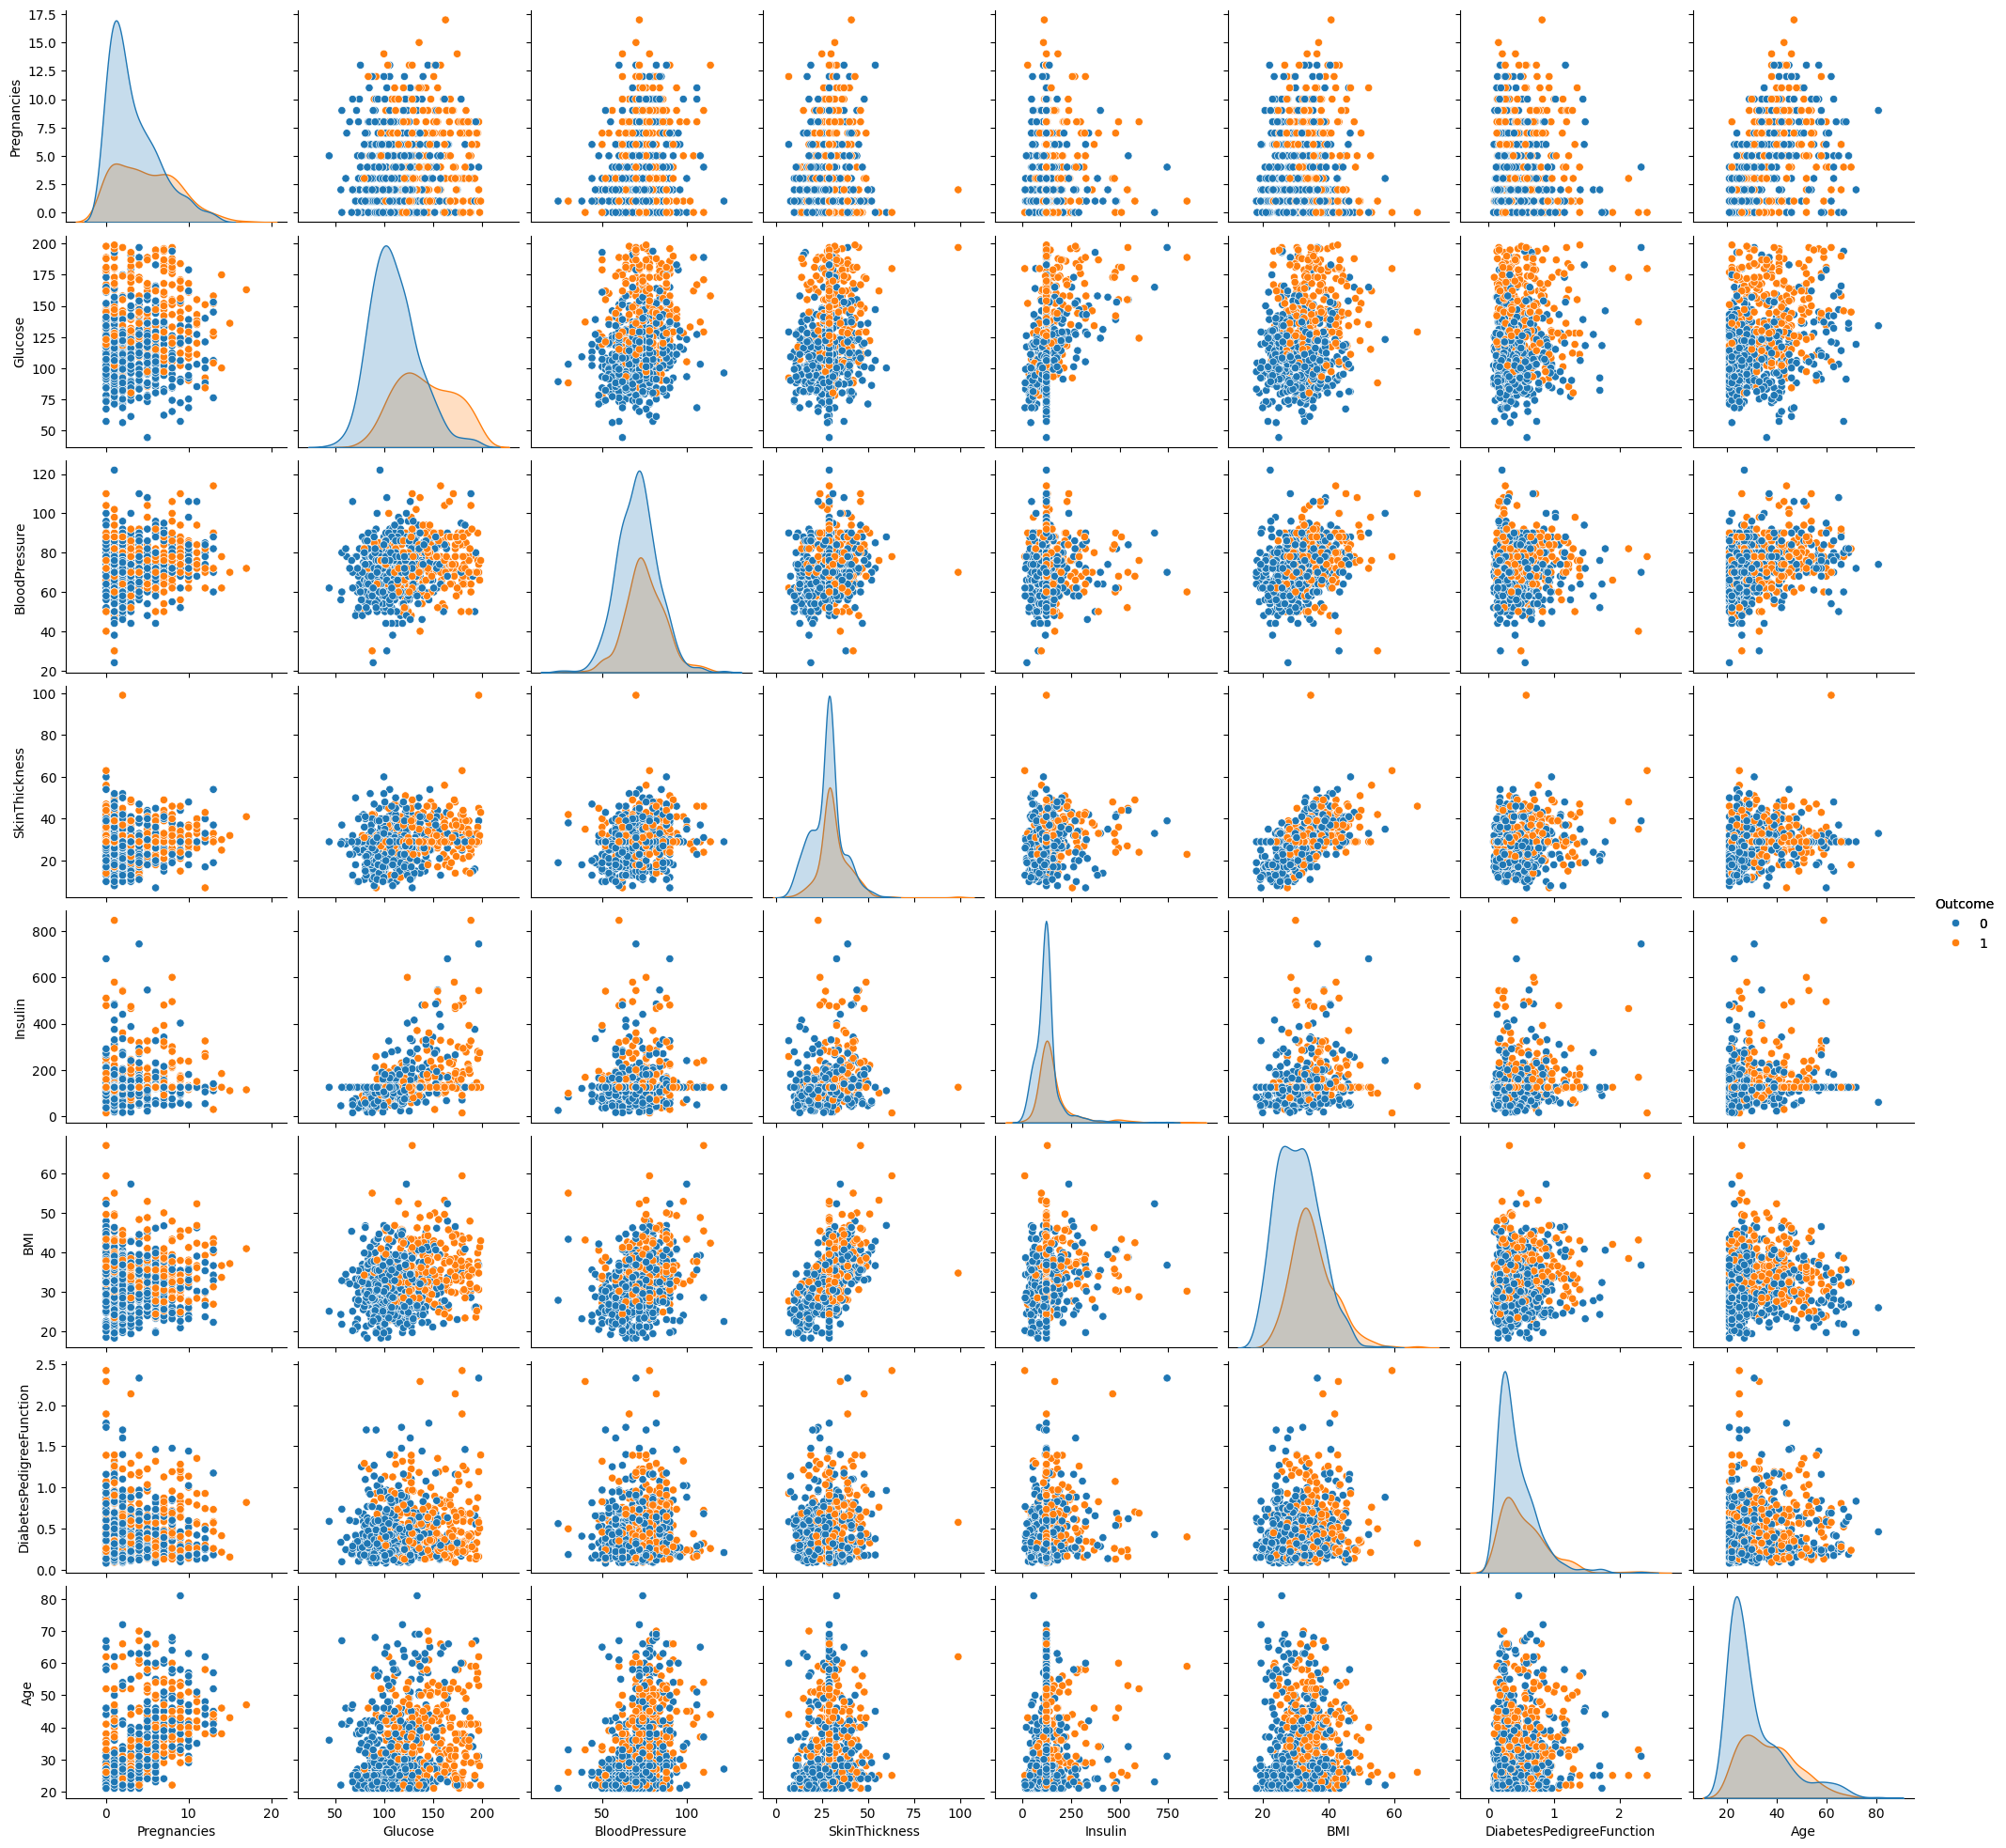

In [407]:
# pairplot with cleaned data
pair_plot= sns.pairplot(df2, hue='Outcome')
pair_plot.add_legend()

### Individuals with a glucose level above 100, along with other risk factors, are at a higher risk of developing diabetes.

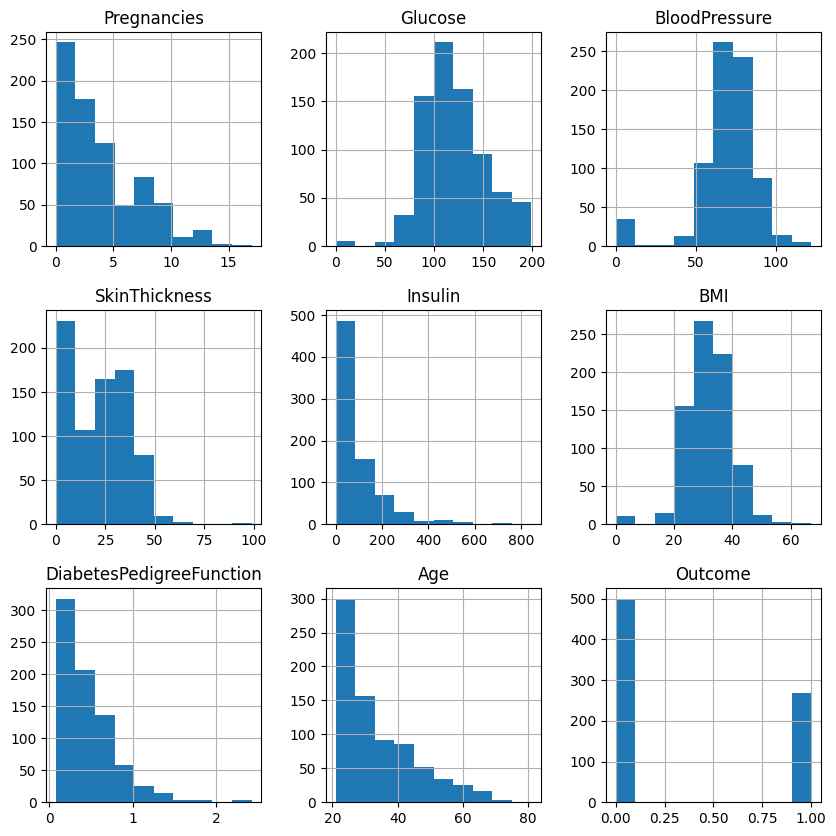

In [416]:
# Histogram with uncleaned data
df.hist(figsize=(10, 10))
plt.show()

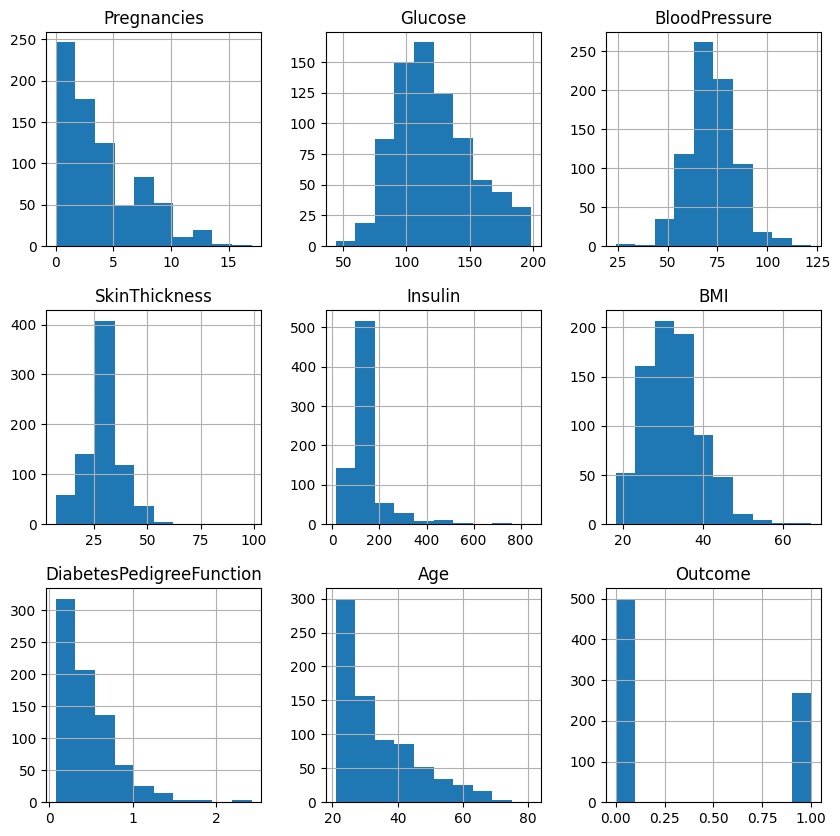

In [417]:
# Histograms with cleaned data
df2.hist(figsize=(10, 10))
plt.show()

#### value counts of positive and negative in Outcome column . 

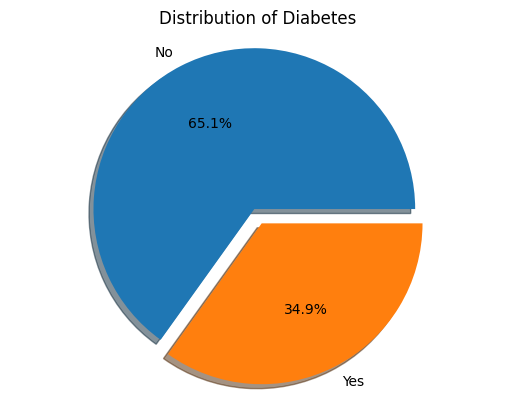

In [458]:
labels = ['No', 'Yes']
explode = (0.1, 0.0)
plt.pie(df['Outcome'].value_counts(), explode=explode, labels=labels,autopct = '%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Distribution of Diabetes')
plt.show()

### 
- Out of 768 patients, 500 do not have diabetes, which accounts for 65.1% of the total, while the remaining 34.9% of patients have been diagnosed with diabetes.
- Higher glucose levels are often linked to a higher probability of having diabetes.
- The model demonstrates a decent level of precision in predicting diabetes, achieving approximately 80% accuracy.
- The accuracy score of LogisticRegression on the test set is 77.27%, while the average accuracy score from cross-validation is approximately 76.83%. This indicates that the model performs consistently when predicting outcomes on unseen data.